<a href="https://colab.research.google.com/github/mohankrishna12/projects/blob/master/Perceptron_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# "Perceptron_Learning_Algorithm.ipynb"
# Author: Pallapu Mohan Krishna
# Indian Institute of Technology Guwahati
# Date: August 2023

In [4]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [159]:
#Generating Some data points by using gaussian distribution having means 0, 3 and standard deviation as 1
mu1,mu2, sigma = 0,5, 1.0 # mean1,mean2 and standard deviation
s1 = np.random.normal(mu1, sigma, size=[100,2])
s2= np.random.normal(mu2, sigma, size=[100,2])

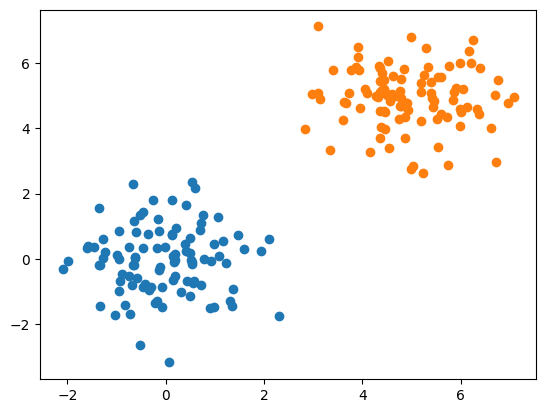

In [160]:
# plotting the data

plt.scatter(s1[:,0], s1[:,1])
plt.scatter(s2[:,0], s2[:,1])

In [161]:
# Create an empty array X of shape (2 * N, M + 1) and fill with ones , this extra column is added for bias
X = np.ones((2 * s1.shape[0], s1.shape[1] + 1))

#here I am mixing the rows of s1 and s2 to have some randomness in learning

# Assign s1 values to even rows and first two columns
X[::2, :s1.shape[1]] = s1

# Assign s2 values to odd rows and first two columns
X[1::2, :s2.shape[1]] = s2

print(X.shape)


(200, 3)


In [162]:
#X=np.vstack((s1,s2))
#X.shape

In [163]:

#For_Bias=np.ones((200,1),dtype=X.dtype)


#X=np.hstack((X,For_Bias))

#X.shape
#For_Bias.shape

In [164]:
X.size

600

In [165]:
# prepare the labels for the points
Y=np.empty((200,1))
Y[::2,:2] = 1.0  #allocating 0 mean samples as label 1
Y[1::2,:2] = -1.0   #allocating 3 mean samples as label -1 (according to the mixture I have done earlier)
print(Y.shape)

(200, 1)


In [166]:
X

array([[-1.59527402e+00,  3.19568503e-01,  1.00000000e+00],
       [ 3.93864837e+00,  5.80627474e+00,  1.00000000e+00],
       [ 4.25195752e-01,  2.28795973e-01,  1.00000000e+00],
       [ 5.24664389e+00,  5.63222073e+00,  1.00000000e+00],
       [ 1.87731731e-01, -5.41976439e-01,  1.00000000e+00],
       [ 4.16488998e+00,  3.26151799e+00,  1.00000000e+00],
       [-6.23791612e-01,  3.71824978e-02,  1.00000000e+00],
       [ 4.98224177e+00,  2.74560270e+00,  1.00000000e+00],
       [ 1.09464987e+00,  7.39827297e-02,  1.00000000e+00],
       [ 4.28807712e+00,  5.00720009e+00,  1.00000000e+00],
       [-6.18990470e-01,  4.08292375e-02,  1.00000000e+00],
       [ 5.85581054e+00,  4.86193333e+00,  1.00000000e+00],
       [ 5.64984196e-01, -7.35249179e-01,  1.00000000e+00],
       [ 5.22978203e+00,  2.63725551e+00,  1.00000000e+00],
       [-6.57832013e-01, -1.81138635e-01,  1.00000000e+00],
       [ 5.03516472e+00,  2.84660213e+00,  1.00000000e+00],
       [ 1.15930909e+00,  5.56645129e-01

In [167]:

Y

array([[ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
      

In [168]:
print(X.shape)
print(Y.shape)

(200, 3)
(200, 1)


In [169]:
X.size

600

In [170]:
# Initialize W with all 0s
W = np.zeros(X.shape[1])

In [171]:
W

array([0., 0., 0.])

In [172]:
W.shape

(3,)

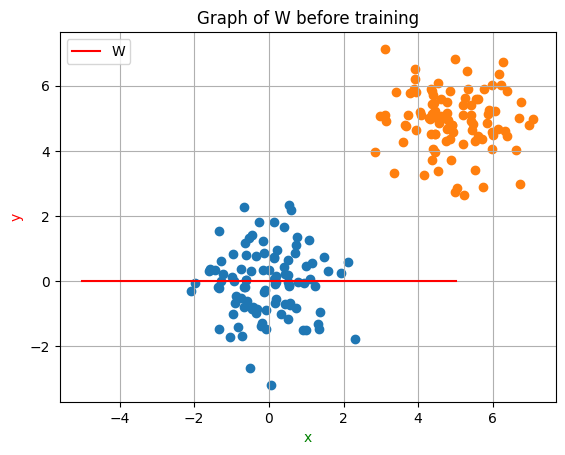

In [173]:
#Here I am  plotting the data and initialized weights W before training just for visualisation

x = np.linspace(-5,5,100)
y = np.zeros(100,)
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='green')
plt.ylabel('y', color='red')
plt.legend(loc='upper left')

plt.scatter(s1[:,0], s1[:,1])
plt.scatter(s2[:,0], s2[:,1])
plt.grid()
plt.show()

In [174]:
X.size

600

In [179]:
#The perceptron Learning algorithm

def train_perceptron(x, y, w, nb_epochs_max):
  for e in range(nb_epochs_max):
    nb_changes = 0
    for i in range(x.shape[0]):
      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
    print('Number of changes: %d'%nb_changes) # prints the number of changes every epoch
    if nb_changes == 0:
        print('Early stopping at epoch number %d',e)
        break;
  print('Number of changes: %d'%nb_changes)  # prints the number of chages in the end
  return w

In [180]:
print(X.shape)
print(Y.shape)
print(W.shape)

(200, 3)
(200, 1)
(3,)


In [181]:
W = train_perceptron(X,Y, W, 100)
print(W)

Number of changes: 0
Early stopping at epoch number %d 0
Number of changes: 0
[-1.01168412 -0.71843416  5.        ]


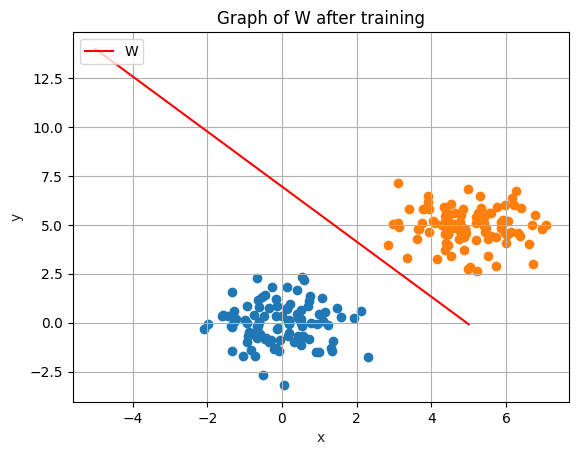

In [182]:
# Plot the data and W after training

x = np.linspace(-5,5,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(s1[:,0], s1[:,1])
plt.scatter(s2[:,0], s2[:,1])
plt.grid()
plt.show()

**bold text**

In [186]:
mu1,mu2, sigma = 0,3, 1.0 # mean1,mean2 and standard deviation
z1 = np.random.normal(mu1, sigma, size=[100,2])
z2= np.random.normal(mu2, sigma, size=[100,2])

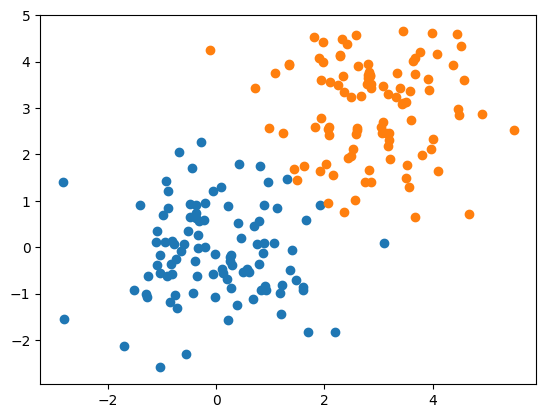

In [187]:
# plotting the data

plt.scatter(z1[:,0], z1[:,1])
plt.scatter(z2[:,0], z2[:,1])

In [195]:
# Create an empty array X of shape (2 * N, M + 1) and fill with ones , this extra column is added for bias
X1 = np.ones((2 * z1.shape[0], z1.shape[1] + 1))

#here I am mixing the rows of s1 and s2 to have some randomness in learning

# Assign s1 values to even rows and first two columns
X1[::2, :z1.shape[1]] = z1

# Assign s2 values to odd rows and first two columns
X1[1::2, :z2.shape[1]] = z2

print(X1.shape)


(200, 3)


In [196]:
# prepare the labels for the points
Y1=np.empty((200,1))
Y1[::2,:2] = 1.0  #allocating 0 mean samples as label 1
Y1[1::2,:2] = -1.0   #allocating 3 mean samples as label -1 (according to the mixture I have done earlier)
print(Y1.shape)

(200, 1)


In [203]:
# Initialize W with all 0s
Weight = np.zeros(X1.shape[1])

In [204]:
Weight = train_perceptron(X1,Y1, Weight, 100)
print(Weight)

Number of changes: 17
Number of changes: 5
Number of changes: 7
Number of changes: 8
Number of changes: 8
Number of changes: 6
Number of changes: 6
Number of changes: 7
Number of changes: 5
Number of changes: 4
Number of changes: 6
Number of changes: 6
Number of changes: 7
Number of changes: 5
Number of changes: 4
Number of changes: 6
Number of changes: 8
Number of changes: 6
Number of changes: 3
Number of changes: 4
Number of changes: 4
Number of changes: 4
Number of changes: 6
Number of changes: 8
Number of changes: 5
Number of changes: 4
Number of changes: 4
Number of changes: 6
Number of changes: 8
Number of changes: 4
Number of changes: 7
Number of changes: 5
Number of changes: 6
Number of changes: 4
Number of changes: 4
Number of changes: 1
Number of changes: 7
Number of changes: 6
Number of changes: 5
Number of changes: 4
Number of changes: 4
Number of changes: 4
Number of changes: 4
Number of changes: 8
Number of changes: 7
Number of changes: 4
Number of changes: 4
Number of ch

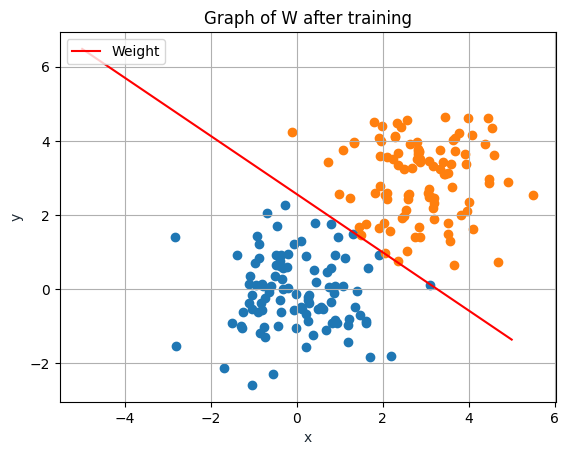

In [205]:
# Plot the data and W after training

x = np.linspace(-5,5,100)
y = -(Weight[0].item()/Weight[1].item())*x - (Weight[2].item()/Weight[1].item())
plt.plot(x, y, '-r', label='Weight')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(z1[:,0], z1[:,1])
plt.scatter(z2[:,0], z2[:,1])
plt.grid()
plt.show()

#*Description:*
1)Generated synthetic data by using gaussian distribution and I have named them s1 having 0 mean and s2 having mean 5 and standard deviation as 1 for both sets.

2) since this can be linearly separable , we have the following result




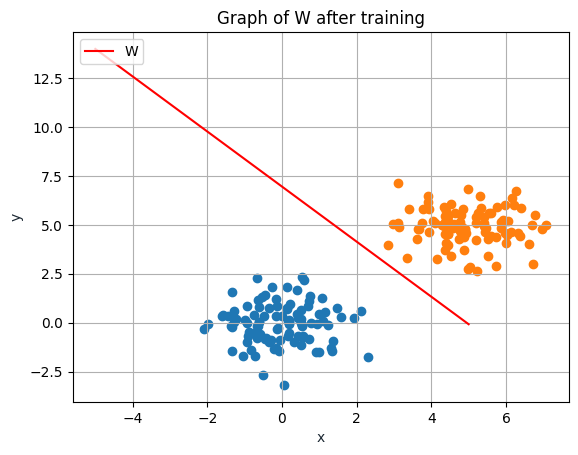




3) lets change the mean for second set for showing non linearly separable
i.e s1 have mean 0 and std.dev as z1 and z2 as mean 3 and std.deviation as 1, we have the result as follows:

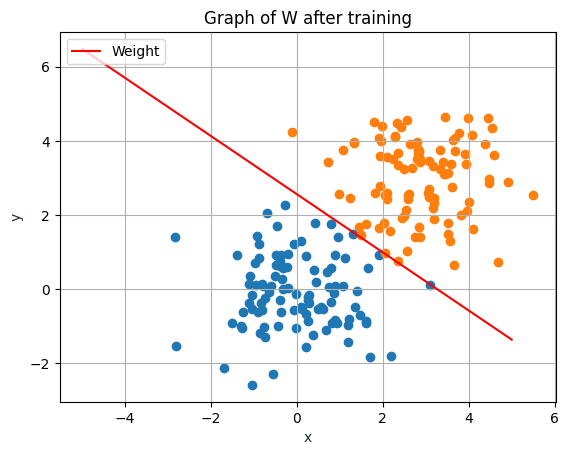

#**Observations**
1) For not linearly seperable data perceptron not converges (might in some cases depends on data) even after sufficient number of weight updates
2) For linearly seperable data perceptron will converge after finite steps of updations.

**References:**

1)https://youtu.be/vAOI9kTDVoo?si=JQ8kOJLq3R4b3U4d

2)https://www.cse.iitb.ac.in/~shivaram/teaching/old/cs344+386-s2017/resources/classnote-1.pdf

3)DL4CV course , Dr.Konda Reddy Mopuri

4)https://youtu.be/VRcixOuG-TU?si=TRz_MXRNDOPDadDH
